<a href="https://colab.research.google.com/github/Bjoshua25/WORLD-POPULATION-GROWTH-RATE-PREDICTION/blob/main/World_Population_Growth_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Population Growth Rate Prediction | Decision trees

We begin by importing the necessary packages for the challenges.

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

## The dataset

The dataset contains population data for various countries over the years from 1960 to 2017. Each row corresponds to a specific country, identified by a country code, and each column represents a year. The values within the dataset represent the population count for each country in the corresponding year.

In [2]:
population_df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/AnalyseProject/world_population.csv', index_col='Country Code')
population_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,10854428.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,6642632.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


## **Exploratory Data Analysis (EDA)**

In this section, we analyze global population trends over time and visualize key patterns.

<Figure size 2000x600 with 0 Axes>

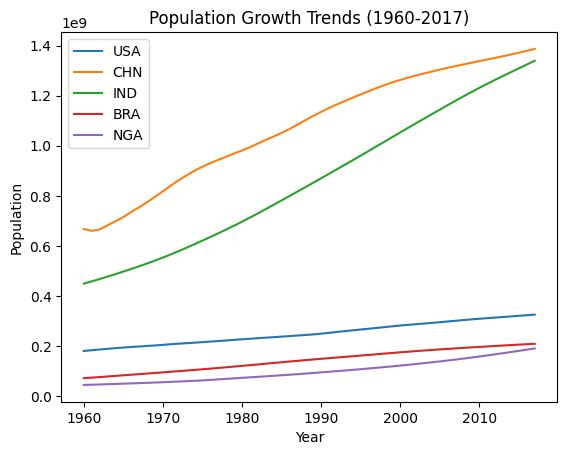

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot population trends for a few countries
plt.figure(figsize=(20,6))
selected_countries = ['USA', 'CHN', 'IND', 'BRA', 'NGA']
population_df.loc[selected_countries].T.plot()
plt.title('Population Growth Trends (1960-2017)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(selected_countries)
plt.show()

### Population growth

The world population data spans from 1960 to 2017. We'd like to build a predictive model that can give us the best guess at what the population growth rate in a given year might be. We will calculate the population growth rate as follows:-

$$
Growth\_rate = \frac{current\_year\_population - previous\_year\_population}{previous\_year\_population}
$$

As such, we can only calculate the growth rate for the year 1961 onwards.

Write a function that takes the `population_df` and a `country_code` as input and computes the population growth rate for a given country starting from the year 1961. This function must return a return a 2-d numpy array that contains the year and corresponding growth rate for the country.

In [32]:
### START FUNCTION
def get_population_growth_rate_by_country_year(df,country_code):
    years = list(map(int, df.columns[1:]))
    rates = [(df.loc[country_code][str(y)] - df.loc[country_code][str(y-1)])/df.loc[country_code][str(y-1)] for y in years]
    return np.round(np.vstack([years,rates]).T,5)
### END FUNCTION

Input:

In [33]:
get_population_growth_rate_by_country_year(population_df,'ABW')

array([[ 1.961e+03,  2.263e-02],
       [ 1.962e+03,  1.420e-02],
       [ 1.963e+03,  8.360e-03],
       [ 1.964e+03,  5.940e-03],
       [ 1.965e+03,  5.750e-03],
       [ 1.966e+03,  6.190e-03],
       [ 1.967e+03,  5.890e-03],
       [ 1.968e+03,  5.700e-03],
       [ 1.969e+03,  5.820e-03],
       [ 1.970e+03,  5.740e-03],
       [ 1.971e+03,  6.380e-03],
       [ 1.972e+03,  6.730e-03],
       [ 1.973e+03,  6.730e-03],
       [ 1.974e+03,  4.730e-03],
       [ 1.975e+03,  2.130e-03],
       [ 1.976e+03, -1.170e-03],
       [ 1.977e+03, -3.630e-03],
       [ 1.978e+03, -4.360e-03],
       [ 1.979e+03, -2.050e-03],
       [ 1.980e+03,  1.930e-03],
       [ 1.981e+03,  7.840e-03],
       [ 1.982e+03,  1.285e-02],
       [ 1.983e+03,  1.395e-02],
       [ 1.984e+03,  1.021e-02],
       [ 1.985e+03,  3.020e-03],
       [ 1.986e+03, -6.060e-03],
       [ 1.987e+03, -1.295e-02],
       [ 1.988e+03, -1.219e-02],
       [ 1.989e+03, -7.700e-04],
       [ 1.990e+03,  1.830e-02],
       [ 1

### Even-odd train-test split

Now that we have our data, we need to divide it into two sets: the variables we will train on and the variables we will predict on. In this scenario, we're separating the variables so that the **training set contains growth rates for even years and the test set contains growth rates for odd years**. We also need to divide our data into the predictive features (`X`) and the response features (`y`).

Write a function that will take a 2-D numpy array as input and return four variables in the form of `(X_train, y_train), (X_test, y_test)`, where `(X_train, y_train)` are the features and response variables of the training set, and `(X_test, y_test)` are the features and response variables of the testing set. The training and testing data consist of even and odd years, respectively. The function should return two tuples of the form `(X_train, y_train), (X_test, y_test)`.

_**Function Specifications:**_
* Should take a 2-d numpy `array` as input.
* Should return two `tuples` of the form `(X_train, y_train), (X_test, y_test)`.
* `(X_train, y_train)` should consist of data from even years and `(X_test, y_test)` should consist of data from odd years.

In [34]:
### START FUNCTION
def feature_response_split(arr):
    even_data = np.array([[x,y] for x,y in zip(arr[:,0],arr[:,1]) if x%2==0])
    odd_data = np.array([[x,y] for x,y in zip(arr[:,0],arr[:,1]) if x%2!=0])
    X_train, y_train = even_data[:, 0], even_data[:, 1]
    X_test, y_test = odd_data[:, 0], odd_data[:, 1]
    return (X_train, y_train), (X_test, y_test)
### END FUNCTION

Input:

In [35]:
data = get_population_growth_rate_by_country_year(population_df,'ABW');
(X_train, y_train), (X_test, y_test) = feature_response_split(data)

### Training Decision Tree Model

Now that we have formatted our data, we can fit a model using sklearn's `DecisionTreeRegressor` class. We'll write a function that will take as input the features and response variables that we created in the last question, and return a trained model.

_**Function Specifications:**_
* Should take two numpy `arrays` as input in the form `(X_train, y_train)` as well as a `MaxDepth` int corresponding to the max_depth hyperparameter in decision trees.
* Should return an sklearn `DecisionTreeRegressor` model.
* The returned model should be fitted to the data.


In [36]:
### START FUNCTION
def train_model(X_train, y_train, MaxDepth):
    lm = DecisionTreeRegressor(max_depth=MaxDepth)
    X_train = X_train.reshape(-1, 1)
    y_train = y_train.reshape(-1, 1)
    lm.fit(X_train, y_train)
    return lm
### END FUNCTION

Input:

In [37]:
data = get_population_growth_rate_by_country_year(population_df,'ABW')
(X_train, y_train), _ = feature_response_split(data)

train_model(X_train, y_train,3).predict([[2017]])

array([0.00451333])

Expected output:

### Evaluation of Model

Now we would like to test our model on the testing data that we produced. This test will give the Root Mean Squared Logarithmic Error (RMSLE), which is determined by:

$$
RMSLE = \sqrt{\frac{1}{N}\sum_{i=1}^N [log(1+p_i) - log(1+y_i)]^2}
$$

* *$p_i$ refers to the $i^{\rm th}$ prediction made from `X_test`
* $y_i$ refers to the $i^{\rm th}$ value in `y_test`
* $N$ is the length of `y_test`

_**Function Specifications:**_
* Should take a trained model and two `arrays` as input. This will be the `X_test` and `y_test` variables from Question 2.
* Should calculate and return the Root Mean Squared Logarithmic Error (RMSLE) between the predicted values from `X_test` and the actual values in `y_test`.
* The output should be a `float` rounded to 3 decimal places.



In [38]:
### START FUNCTION
def test_model(model, y_test, X_test):
    predictions = model.predict(X_test.reshape(-1, 1))
    predictions = predictions.reshape(-1)
    rmsle = np.sqrt(np.mean((np.log(1+predictions) - np.log(1+y_test))**2))
    return np.round(rmsle, 3)
### END FUNCTION

Input:

In [39]:
data = get_population_growth_rate_by_country_year(population_df,'ABW')
(X_train, y_train), (X_test, y_test) = feature_response_split(data)
lm = train_model(X_train, y_train,3)
test_model(lm, y_test, X_test)

np.float64(0.008)